# An Analysis of The Global Light Pollution Standards

**Prannaya Gupta (M21404)**

_Done as part of **CS4232**: Data Analytics_

## Table of Contents

## Introduction
A side-effect of technological advancement has been the amount of light pollution in the world today. Ever since Thomas Edison’s revolutionary invention of the light bulb, the world has been thrust into a landscape of light-afflicted skies. According to various studies, around 80% of people live under light pollution-afflicted skies every day, and whilst this may not affect the day-to-day life of an individual, astronomers are very much affected by the sudden illumination in the skies. Even the Singaporean sky is very much damaged by light pollution, with 99.5% of all stars being completely invisible without optical aid<sup>[22]</sup>.

In this project, I aim to analyze the implications of the changes in Light Pollution levels over the past few years, utilising global and local data to find possibly relationships. As shown below, I aim to solve a list of Light Pollution-related questions that utilise alternative data to analyse and interpret patterns, including simple statistical and machine-learning related models.

## Research Questions

### A.	What are locations of minimal light pollution intensity which are optimum for astronomical observation?

While one might think that the best locations are in the middle of wilderness or large water bodies (i.e. the ocean), these locations need to be filtered based on accessibility, especially since locations like the middle of the ocean are not feasible locations for people to assemble to watch and will thus not be a great location for astrophotography.

In order to map this, I can use the absolute night-time light datasets<sup>[4-7]</sup> to analyse locations of minimal light intensity. In order to do the filtering of data, I can use the Base Map<sup>[8]</sup> and Matplotlib’s BaseMap Library<sup>[26]</sup>. This can give us a few optimum points best for this type of analysis.


### B.	How has the light pollution data around the world changed? Which countries are most susceptible to high light pollution in the future? Which countries are lessening in terms of light pollution?

There are many countries that have had rampant increases in Light Pollution over the past few years, while others have made an effort to reduce their already increased Light Pollution. We need to map the data in order to find out which countries are susceptible to the level of problematic light pollution that can be found in cities like Singapore.

Due to the possession of the Time Series Data of night-time light pollution data<sup>[1-3]</sup>, we can easily map locations based on relative changes in absolute light magnitude. I intend to use the geolocation datasets<sup>[9-12]</sup> against the time-series night-time light datasets<sup>[1,17]</sup> to find changes and from there and map it using a possible regression model so as to predict the curve of increase/decrease. This can be used to make predictions and compare to other light pollution levels.


### C. What are the impacts of Light Pollution on the Biodiversity around the area?

High Light Pollution can have a detrimental impact on animals’ survival, hence they are likely to be found in areas with lesser light pollution, which can be adopted as a hypothesis. Another investigation could be what types of animals can be found closer to Light pollution related areas. For example, Moths should ideally be found in high light pollution, but endangered species will likely not be found in similar areas.

Based on the eBird Observation Dataset<sup>[13]</sup>, we can find relative values symbolising the animals’ survival patterns and frequency of observations, thereby relating it to Time Series Night-time Light Data so as to procure information regarding how the birds have moved about in the presence of light pollution. The International Barcode of Life dataset<sup>[14]</sup> is also a logical dataset to not only map frequency patterns but also classify the observations based on existing models and thus finding frequencies of these animals based on Time Series Light Pollution.


### D.	What are the effects and relevance of different types of light facilities on light pollution in the area?

One of the factors claimed culpable for the increased light pollution in Singapore is the extreme number of street lights and traffic lights. Hence, I wish to investigate how the frequency of these lights affect the light pollution around the area. I also want to find possible weights to see how relevant these frequencies are.

With the presence of the Light Facilities Datasets<sup>[15-19]</sup>, we can map this on the Absolute Positional Brightness Dataset<sup>[4-7]</sup> so that we can investigate how it’s affects the actual brightness, whilst we can also investigate how it changes with respect to time by using the Time Series night-light data<sup>[1-3]</sup> and the time based datasets<sup>[15,19]</sup>. This can then be used to compute possible patterns and predictions regarding where the Singapore light pollution may lead up to. To consider Singapore alone, I will be using Geopy<sup>[25]</sup> for the most part and filtering coordinates based on available geographical information.


### E.	What is the relation between the average energy consumption and general demographics in each area (eg Tampines, Jurong etc) and the Light Pollution?

A reason for considering this is the lack of mathematical analysis as to how energy consumption in specific districts affect the light pollution there. General mathematics regarding data in Singapore itself hasn’t been explored, hence using this is a good way of exploring something new. We can model the types of houses, general types of people living there, and the energy consumption based on that and from there, we can test how it affects nearby light pollution.

I intend to use the Economical Datasets that give data regarding the Singapore Energy Consumption statistics<sup>[20]</sup> and the Singapore Resident demographics<sup>[21]</sup>. The usage of the Absolute positional brightness datasets<sup>[4-7]</sup>, filtering Singapore similarly to the previous research question. This can therefore be using in conjunction to find possible patterns.

## Set-Up and Imports

Firstly, we need to perform a simple set-up. This involves the following steps:

1. Import the `autoreload` extension which can allow us to avoid leaving Jupyter at a stagnant file state.
2. Install some libraries, like `np`, `imagecodecs`, `lxml` and `gdal`
     - **Note**: For gdal, which is the Python API Wrapper for the C library GDAL, the installation is a lot more complex than just pip install, hence there is a script. Additional info is provided in the corresponding section
3. Import libraries, which include:
     - Crucial Ones like `random`, `re` and `glob`
     - Mathematica Libraries like `numpy` and `scipy`
     - Data Wrangling Libraries like `pandas` and `lxml`
     - Plotting Libraries like `matplotlib`, `seaborn` and `plotly`
     - Web Scraping Libraries like `bs4` and `requests`
     - Image Processing Libraries like `cv2`, `skimage` and `PIL`
     - Machine Learning Libraries like `sklearn`
     
### Installation Instructions

In this project, I am using the following external libraries:
- `scikit-image`: download using conda if possible.
- `pillow`: predownloaded in conda, install using pip if you are using a default python environment
- `opencv-python`: install using pip in any case
- `lxml`: install using pip if possible
- `geopy`: install using pip or conda
- `geopandas`: install using conda if possible
     - `gdal`: installed with Geopandas.


In [1]:
%load_ext autoreload
%autoreload 2
# to ensure kernel resets when files change around it

In [2]:
import random, time, math, datetime, os, re
from glob import glob
import sys, tarfile, gzip
from pprint import pprint

from IPython.display import clear_output, HTML, Markdown
from IPython import display

import warnings
warnings.filterwarnings("ignore")

import np, numpy
import pandas as pd
from lxml import objectify, etree, html
from io import StringIO, BytesIO

import scipy as sp
from scipy import stats, special

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (16.0, 8.0)

from bs4 import BeautifulSoup
import requests, bs4

import cv2

from skimage.color import rgb2gray, gray2rgb
from skimage import filters
from skimage.transform import rescale, resize, downscale_local_mean, swirl
from skimage.filters import threshold_otsu, threshold_local, try_all_threshold
import skimage.io as skio
from PIL import ImageOps
import PIL

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression

import folium
from folium import plugins
import plotly.express as px

import geopy, geopandas as gp
from osgeo import gdal

## Definitions
This section pertains to tools created with the express purpose of mathematical and image-based analyses.

Here, you can find the following:
1. Correlation Computational Methods
2. Pandas-based customized data reading functions
3. An Image Class for any Image Processing Concerns
4. A GeoTiff Class to access GeoTiff files and embed it as both a GeoDataFrame and Image

In [3]:
# Functions I painstakingly researched and coded with 2 shots of coffee at 3 am

def gamma(n):
    """
    A Simplified Gamma Function for "powers" of 1/2
    Gamma Function for Integers are given by: Γ(n) = (n-1)!
    Gamma Function for Values ending with 1/2: Γ(n) = 0.5 * 1.5 * ... * (n-1) * √(π)

    Gamma Function is generally given by the following expression
    """
    return np.arange(1 - (n%1), n).prod() * np.pi ** (n%1)

def beta(x, y):
    """
    Actual Beta Function based ont he Simplified Gamma Function above.
    """
    return gamma(x)*gamma(y)/gamma(x+y)

def I(x, a, b):
    if gamma(a) == np.inf or gamma(b) == np.inf or gamma(a+b) == 0: return 0
    if x == 0 or x == 1: return x
    if b == 1: return x ** a
    if a == 1: return 1 - (1-x)**b
    if b > 1: return I(x, a, b-1) + (x**a * (1-x)**(b-1))/((b-1)*beta(a, b-1))
    if a > 1: return I(x, a-1, b) - (x**(a-1) * (1-x)**b)/((a-1)*beta(a-1, b))
    return ((-1)**a) * I(x/(x-1), a, 1-a-b) * beta(a, 1-a-b)


def corr(data):
    norm = data - data.mean(axis=0)
    return norm.prod(axis=1).sum() / np.sqrt((norm**2).sum(axis=0).prod())

def p(r, bound):
    return 2*I((1-abs(r))/2, bound, bound)

def pearson(data):
    r = corr(data)
    return r, p(r, data.shape[0]/2-1)

def pearsonr(x, y):
    x, y = x - x.mean(axis=0), y - y.mean(axis=0)
    r = (x.T @ y).sum(axis=0) / np.sqrt(((x**2).sum(axis=0) * (y**2).sum(axis=0)))
    p_val = 2 * np.vectorize(lambda r: p(r, x.shape[0]/2-1))(r)
    return np.stack((r, p_val), axis=len(r.shape))

In [4]:
def read_csv(loc, *args, **kwargs):
    if re.search(r"[(http(s)?):\/\/(www\.)?a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)", loc):
        return read_csv(requests.get(loc, allow_redirects=True).content, *args, **kwargs)
    loc = loc.strip("\n")
    if re.search(r"[\n:<>\"/\|?*]", loc):
        return pd.read_csv(StringIO(loc), *args, **kwargs)
    else:
        return pd.read_csv(loc, *args, **kwargs)

In [5]:
class Resize:
    def __init__(self, img):
        self.img = img

    def __call__(self, func):
        return self.img.apply(lambda img: resize(img, func(img.shape)), "Resized Version of "+self.img.name)

    # def local_mean(self, output_shape):
    #     return self.img.apply(lambda img: resize_local_mean(img, output_shape), self.img.name+" resized by local mean "+str(output_shape))


class Plot:
    def __init__(self, img):
        self.img = img

    def __call__(self):
        self.img.show()

    def contour(self, ax=None, title=""):
        self.img.contourplot(ax=ax, title=title)

    def imageReport(self):
        self.img.createImageReport()

class LatLong:
    def __init__(self, img):
        self.h, self.w = img.h, img.w

    def LongfromX(self, x):
        return 360 * x / self.w - 180

    def LatfromY(self, y):
        return - np.arctan(np.sinh((y / self.h) * 2 * np.pi - np.pi)) * 180 / np.pi

    def XfromLong(self, long):
        return (x + 180) * self.w / 360

    def YfromLat(self, lat):
        y = (np.arcsinh(np.tan(lat * np.pi / 180)) + np.pi) * self.h / (2 * np.pi)

class Image:
    def __init__(self, img: np.ndarray, name: str, path: str = ""):
        if name == "":
            name = path.split("/")[-1].split(".")[0]

        self.name = name
        self.title = "Image of " + name
        self.path = path
        self.img = img
        self.isGray = len(self.img.shape) == 2
        self.resize = Resize(self)
        self.plot = Plot(self)
        self.latlong = LatLong(self)

    @classmethod
    def open(cls, path: str, name: str = ""):
        return cls(skio.imread(path), name=name, path=path)

    @classmethod
    def read(cls, path:str, name:str = ""):
        if re.search(r"[(http(s)?):\/\/(www\.)?a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)", path) and re.search("((http|https)://)(www.)?[a-zA-Z0-9@:%._\\+~#?&//=]{2,256}\\.[a-z]{2,6}\\b([-a-zA-Z0-9@:%._\\+~#?&//=]*)", path):
            return cls(np.asarray(PIL.Image.read(requests.get(url, stream=True).raw)), name=name, path=path)
        else: return cls(skio.imread(path), name=name, path=path)

    def show(self, title="", ax=None):
        if ax is None:
            plt.axis("off")
            plt.imshow(self.img, cmap="gray" if self.isGray else None)
            plt.title(title if title else self.title)
            plt.show()
        else:
            plt.axis("off")
            ax.imshow(self.img, cmap="gray" if self.isGray else None)
            ax.set_title(title if title else self.title)

        return "%s - Retrieved from %s with Shape %s" % (self.title, self.path, self.shape)

    def __repr__(self):
        return self.show()

    def __str__(self):
        return self.name

    def to_numpy(self):
        return self.img

    @property
    def shape(self):
        return self.img.shape

    @property
    def h(self):
        return self.img.shape[0]

    @property
    def w(self):
        return self.img.shape[1]

    def gray(self):
        return self if self.isGray else Image(rgb2gray(self.img), name="Grayscale of "+self.name, path=self.path)

    def red(self):
        img = self.img.copy()
        img[:, :, 1:] = 0
        return Image(img, name="Red Part of "+self.name, path=self.path)

    def green(self):
        img = self.img.copy()
        img[:, :, ::2] = 0
        return Image(img, name="Green Part of "+self.name, path=self.path)

    def blue(self):
        img = self.img.copy()
        img[:, :, :2] = 0
        return Image(img, name="Blue Part of "+self.name, path=self.path)

    def flipud(self):
        return Image(np.flipud(self.img), name=self.name+" Flipped Vertically", path=self.path)

    def fliplr(self):
        return Image(np.fliplr(self.img), name=self.name+" Flipped Horizontally", path=self.path)

    def invert(self):
        return Image((1 if np.all(self.img < 1) else 63 if np.all(self.img < 64) else 255) - self.img, name=self.name+" Inverted", path=self.path)

    def transpose(self):
        return Image(np.transpose(self.img, [1, 0, 2]), name=self.name+" Transposed", path=self.path)

    def spotlight(self):
        img = np.copy(self.img)
        h, w = img.shape
        img[np.sqrt(np.arange(-(w-1)/2, (w+1)/2)**2 + np.arange(-(h-1) /
                    2, (h+1)/2)[:, np.newaxis] ** 2) > min(h, w)/2] = 0
        return Image(img, name="Spotlight of "+self.name, path=self.path)

    def convolve(self, kernel):
        image = self.img
        return Image((np.transpose(np.transpose(image[np.arange(kernel.shape[1]) + np.arange(image.shape[0] + 1 - kernel.shape[0])[:, np.newaxis]], (0, 2, 1))[:, np.arange(kernel.shape[0]) + np.arange(image.shape[1] + 1 - kernel.shape[1])[:, np.newaxis]], (0, 1, 3, 2)) * kernel).sum((2, 3)), name=self.name+" Convolved", path=self.path)

    def blur(self, patchSize):
        return Image(self.convolve(kernel=np.full((patchSize, patchSize), 1/patchSize**2)).to_numpy(),
                     name="{}% Blur of {}".format(patchSize, self.name), path=self.path)

    def colorHist(self, title="", ax=None):
        if ax is None:
            plt.hist(self.img.ravel(), bins=256)
            plt.title(title if title else "Color Histogram of %s" % self.name)
            plt.show()
        else:
            ax.hist(self.img.ravel(), bins=256)
            ax.set_title(
                title if title else "Color Histogram of %s" % self.name)

    def threshColorHist(self, thresh, title="", ax=None):
        if ax is None:
            fig, ax = plt.subplots(1, 1)

        self.colorHist(
            ax=ax, title=self.title if self.title else "Thresholded Color Histogram of %s" % self.name)
        try:
            thresh = float(thresh)
            ax.axvline(x=thresh, color="r")
        except:
            pass

    def laplacian(self):
        return Image(cv2.Laplacian(self.img, cv2.CV_64F), "Laplacian Filter on "+self.name, path=self.path)

    def sobelX(self):
        return Image(cv2.Sobel(self.img, cv2.CV_64F, 1, 0, ksize=5), "Sobel X Filter on "+self.name, path=self.path)

    def sobelY(self):
        return Image(cv2.Sobel(self.img, cv2.CV_64F, 0, 1, ksize=5), "Sobel Y Filter on "+self.name, path=self.path)

    def sobel(self):
        return Image(filters.sobel(self.gray().img), "Sobel Filter on "+self.name, path=self.path)

    def toColor(self):
        return Image(cv2.cvtColor(self.img, cv2.COLOR_GRAY2RGB), "Colorized "+self.name, path=self.path) if self.isGray else self

    def rescale(self, scale):
        return self.apply(lambda img: rescale(img, scale), self.name + " Rescaled to {.2f}%".format(scale*100))

    def swirl(self, rotation=0, strength=10, radius=120, *args, **kwargs):
        return self.apply(lambda img: swirl(img, rotation=rotation, strength=strength, radius=radius, *args, **kwargs), self.name+" Swirled")

    def contourplot(self, ax=None, title=""):
        if ax is None:
            plt.contour(self.img, [50, 200])
            plt.title(title if title else "Contourplot of %s" % self.title)
        else:
            ax.contour(self.img, [50, 200])
            ax.set_title(title if title else "Contourplot of %s" % self.title)

    def apply(self, func, name=""):
        return Image(func(self.img), name=name if len(name) else "Function on "+self.name, path=self.path)

    def threshold(self, func, name=""):
        return Image(self.img > func(self.img), name=name if len(name) else "Thresholding Function on "+self.name, path=self.path)

    def scattered(self):
        edges_img = self.sobel().img
        x, y = np.argwhere(edges_img > 0.07).T
        return y, -x

    def scatter(self, ax=None, s=0.1, title="", figsize=(10, 13)):
        x, y = img.scattered()
        if ax is None:
            plt.figure(figsize=figsize)
            plt.scatter(x, y, s=s)
            plt.title(title if title else "Scatterplot of %s" % self.title)
        else:
            ax.scatter(x, y, s=s)
            ax.set_title(title if title else "Scatterplot of %s" % self.title)

        return stats.pearsonr(x, y)

    def createImageReport(self):
        img = self.toColor() if self.isGray else self
        gray = self if self.isGray else self.gray()

        fig, axes = plt.subplots(4, 4, figsize=(30, 30))

        img.show(title="Original "+img.title, ax=axes[0, 0])
        img.flipud().show(ax=axes[0, 1])
        img.fliplr().show(ax=axes[0, 2])
        img.transpose().show(ax=axes[0, 3])

        img.red().show(ax=axes[1, 0])
        img.blue().show(ax=axes[1, 1])
        img.green().show(ax=axes[1, 2])
        img.invert().show(ax=axes[1, 3])

        img.laplacian().show(ax=axes[2, 0])
        img.sobelX().show(ax=axes[2, 1])
        img.sobelY().show(ax=axes[2, 2])
        img.sobel().show(ax=axes[2, 3])

        gray.threshold(
            threshold_otsu, name="Global Thresholding of "+img.name).show(ax=axes[3, 0])
        gray.spotlight().show(ax=axes[3, 1])
        gray.blur(15).show(ax=axes[3, 2])
        gray.colorHist(ax=axes[3, 3])


class GeoTiff(gp.GeoDataFrame):
    def __init__(self, ds, name):
        self.ds = ds
        self.img = ds.GetRasterBand(1).ReadAsArray().astype(np.uint8)
        self.cols = ds.RasterXSize
        self.rows = ds.RasterYSize
        self.shape = np[self.rows, self.cols]
        self.geotransform = np.array(ds.GetGeoTransform())
        self.xmin = geotransform[0]
        self.xmax = np[1, cols] @ geotransform[:2]
        self.xbounds = np[self.xmin, self.xmax]
        self.ymin = np[1, rows] @ geotransform[3:6:2]
        self.ymax = geotransform[3]
        self.ybounds = np[self.ymin, self.ymax]
        self.centerx = self.xbounds.mean()
        self.centery = self.ybounds.mean()
        self.center = np[self.centerx, self.centery]

        path = ds.getDescription()

        self.df = pd.DataFrame(self.img, index=np.linspace(self.ymin, self.ymax, self.rows), columns=np.linspace(self.xmin, self.xmax, self.cols)).stack().replace(0, np.nan).dropna().reset_index().rename(columns={"level_1":"Longitude", "level_0":"Latitude", 0: "Intensity"})

        gp.GeoDataFrame.__init__(self.df, geometry=gp.points_from_xy(self.df.Longitude, self.df.Latitude))
        #Image.__init__(self, img=img, name=name, path=path)

    @classmethod
    def open(cls, path: str, name: str = ""):
        return cls(gdal.Open(path, gdal.GA_ReadOnly), name=name)

    @classmethod
    def read(cls, path: str, name: str = ""):
        return cls(gdal.Open(path, gdal.GA_ReadOnly), name=name)

    def folium(self):
        m = folium.Map(location=self.center, zoom_start=1, tiles='Stamen Terrain')
        incidents = folium.map.FeatureGroup()
        pd.DataFrame.apply(self, lambda row: incidents.add_child(folium.CircleMarker([row.Latitude, row.Longitude], radius=5, color='yellow', fill=True, fill_color='blue', fill_opacity=0.6)) and folium.Marker([row.Latitude, row.Longitude], popup=f"<span style=\"color:#0000FF\">{row.Intensity}</span>").add_to(m), axis = 1)
        m.add_child(incidents)
        return m

## Data Acquisition
I will be acquiring the following datasets in this project:
1. [A harmonized global nighttime light dataset 1992–2018](https://www.nature.com/articles/s41597-020-0510-y)
2. [Globe At Night - Sky Brightness Monitoring Network (GaN-MN)](https://www.globeatnight.org/maps.php)
3.

### Acquring Harmonized Global Nighttime Light (1992 - 2018) Dataset
This dataset is specifically the largest, containing close to 20 billion data points (specifically 20322960028), hence this data has to be acquired in chunks. All the data can be downloaded from a zip file as shown below, and I suggest running the following script on Git Bash, WSL or the Terminal. In case these are not at one's disposal, here are the instructions:
1. Download the zip file from https://figshare.com/ndownloader/articles/9828827/versions/2
2. Make a directory relative to this notebook called `data/nightLight`
3. Unzip all the contents in the zip file into the `nightLight` directory as created in step 2.
4. Remove the zip file, so as to conserve disk space.

Installation can take place as follows:
```sh
mkdir -p data/nightLight
curl https://figshare.com/ndownloader/articles/9828827/versions/2 > nightLight.zip
unzip nightLight.zip -d data/nightLight/
rm nightLight.zip
```

In [7]:
ds = gdal.Open('data/nightLight/Harmonized_DN_NTL_1992_calDMSP.tif', gdal.GA_ReadOnly)
img = ds.GetRasterBand(1).ReadAsArray().astype(np.uint8)
shape = np[ds.RasterYSize, ds.RasterXSize]
print("Shape:", tuple(shape))
geotransform = np.array(ds.GetGeoTransform())
xbounds = np[geotransform[0], np[1, shape[-1]] @ geotransform[:2]]
print("X Bounds:", tuple(xbounds))
ybounds = np[np[1, shape[0]] @ geotransform[3:6:2], geotransform[3]]
print("Y Bounds:", tuple(ybounds))
center = np[xbounds.mean(), ybounds.mean()]
print("Center:", tuple(center))
index = np.linspace(*ybounds, shape[0], dtype=np.uint8)
columns = np.linspace(*xbounds, shape[1], dtype=np.uint8)
df = pd.DataFrame(img, index=index, columns=columns, dtype=np.uint8)
df = df.stack().reset_index()
df = df.rename(columns={"level_1":"Longitude", "level_0":"Latitude", 0: "Intensity"})
gdf = gp.GeoDataFrame(df, geometry=gp.points_from_xy(df.Longitude, df.Latitude))
gdf

Shape: (16801, 43201)
X Bounds: (-180.00416666665, 180.00416522665)
Y Bounds: (-65.00416610665, 75.00416666665)
Center: (-7.200000027296483e-07, 5.000000279999995)


MemoryError: Unable to allocate 1.35 GiB for an array with shape (725820001,) and data type int16

In [ ]:
img = Image.read('data/nightLight/Harmonized_DN_NTL_1992_calDMSP.tif', "1992 Light Pollution")
img

In [ ]:
data1992 = img.to_numpy()
latlong = pd.DataFrame(data1992).rename(index=img.latlong.LatfromY, columns=img.latlong.LongfromX).stack()
#.reset_index().rename(columns={"level_1":"Longitude", "level_0":"Latitude", 0: "Pollution"})
latlong = latlong[latlong > 0].reset_index().rename(columns={"level_1":"Longitude", "level_0":"Latitude", 0: "Pollution"})
latlong #.describe()

In [ ]:
sns.scatterplot(x="Longitude", y="Latitude", hue="Pollution", data=latlong)

### Acquiring Geonames Datasets
Geonames is used to get simple country demographics. While we are only really considering Singapore on a microscopic level, this is used especially to segment the dataset.

In [84]:
geocountries = pd.read_html(requests.get("https://www.geonames.org/countries/").content)[1]
geocountries.Continent.replace(np.nan, "NA", inplace=True)
geocountries

,ISO-3166alpha2,ISO-3166alpha3,ISO-3166numeric,fips,Country,Capital,Area in km²,Population,Continent
0,AD,AND,20,AN,Andorra,Andorra la Vella,468.0,77006,EU
1,AE,ARE,784,AE,United Arab Emirates,Abu Dhabi,82880.0,9630959,AS
2,AF,AFG,4,AF,Afghanistan,Kabul,647500.0,37172386,AS
3,AG,ATG,28,AC,Antigua and Barbuda,St. John's,443.0,96286,NA
4,AI,AIA,660,AV,Anguilla,The Valley,102.0,13254,NA
...,...,...,...,...,...,...,...,...,...
245,YE,YEM,887,YM,Yemen,Sanaa,527970.0,28498687,AS
246,YT,MYT,175,MF,Mayotte,Mamoudzou,374.0,279471,AF
247,ZA,ZAF,710,SF,South Africa,Pretoria,1219912.0,57779622,AF
248,ZM,ZMB,894,ZA,Zambia,Lusaka,752614.0,17351822,AF


In [85]:
geocodes = pd.read_html(requests.get("https://www.geonames.org/statistics/").content)[1].iloc[:250, 1:][['Country', 'CountryCode']]
geocodes

,Country,CountryCode
0,United States,US
1,China,CN
2,India,IN
3,Norway,NO
4,Mexico,MX
...,...,...
245,Norfolk Island,NF
246,San Marino,SM
247,Cocos (Keeling) Islands,CC
248,Bouvet Island,BV


In [86]:
geostats = pd.merge(geocountries, geocodes, on="Country")
geostats

,ISO-3166alpha2,ISO-3166alpha3,ISO-3166numeric,fips,Country,Capital,Area in km²,Population,Continent,CountryCode
0,AD,AND,20,AN,Andorra,Andorra la Vella,468.0,77006,EU,AD
1,AE,ARE,784,AE,United Arab Emirates,Abu Dhabi,82880.0,9630959,AS,AE
2,AF,AFG,4,AF,Afghanistan,Kabul,647500.0,37172386,AS,AF
3,AG,ATG,28,AC,Antigua and Barbuda,St. John's,443.0,96286,NA,AG
4,AI,AIA,660,AV,Anguilla,The Valley,102.0,13254,NA,AI
...,...,...,...,...,...,...,...,...,...,...
245,YE,YEM,887,YM,Yemen,Sanaa,527970.0,28498687,AS,YE
246,YT,MYT,175,MF,Mayotte,Mamoudzou,374.0,279471,AF,YT
247,ZA,ZAF,710,SF,South Africa,Pretoria,1219912.0,57779622,AF,ZA
248,ZM,ZMB,894,ZA,Zambia,Lusaka,752614.0,17351822,AF,ZM


### Acquiring Lat-Long Dataset For Countries Worldwide
This dataset is pretty explanatory, and quite possibly the easiest to acquire. I have simply read Google Developers' `countries.csv` public dataset.

In [89]:
countries_latlong = pd.read_html(requests.get("https://developers.google.com/public-data/docs/canonical/countries_csv").content)[0][["name", "latitude", "longitude"]].rename(columns={"name":"Country"})
countries_latlong

,Country,latitude,longitude
0,Andorra,42.546245,1.601554
1,United Arab Emirates,23.424076,53.847818
2,Afghanistan,33.939110,67.709953
3,Antigua and Barbuda,17.060816,-61.796428
4,Anguilla,18.220554,-63.068615
...,...,...,...
240,Yemen,15.552727,48.516388
241,Mayotte,-12.827500,45.166244
242,South Africa,-30.559482,22.937506
243,Zambia,-13.133897,27.849332


In [91]:
countries_without_coords = pd.merge(geostats, countries_latlong)
countries_without_coords

,ISO-3166alpha2,ISO-3166alpha3,ISO-3166numeric,fips,Country,Capital,Area in km²,Population,Continent,CountryCode,latitude,longitude
0,AD,AND,20,AN,Andorra,Andorra la Vella,468.0,77006,EU,AD,42.546245,1.601554
1,AE,ARE,784,AE,United Arab Emirates,Abu Dhabi,82880.0,9630959,AS,AE,23.424076,53.847818
2,AF,AFG,4,AF,Afghanistan,Kabul,647500.0,37172386,AS,AF,33.939110,67.709953
3,AG,ATG,28,AC,Antigua and Barbuda,St. John's,443.0,96286,NA,AG,17.060816,-61.796428
4,AI,AIA,660,AV,Anguilla,The Valley,102.0,13254,NA,AI,18.220554,-63.068615
...,...,...,...,...,...,...,...,...,...,...,...,...
218,YE,YEM,887,YM,Yemen,Sanaa,527970.0,28498687,AS,YE,15.552727,48.516388
219,YT,MYT,175,MF,Mayotte,Mamoudzou,374.0,279471,AF,YT,-12.827500,45.166244
220,ZA,ZAF,710,SF,South Africa,Pretoria,1219912.0,57779622,AF,ZA,-30.559482,22.937506
221,ZM,ZMB,894,ZA,Zambia,Lusaka,752614.0,17351822,AF,ZM,-13.133897,27.849332


In [92]:
countries = gp.GeoDataFrame(countries_without_coords, geometry=gp.points_from_xy(countries_without_coords.longitude, countries_without_coords.latitude))
countries

,ISO-3166alpha2,ISO-3166alpha3,ISO-3166numeric,fips,Country,Capital,Area in km²,Population,Continent,CountryCode,latitude,longitude,geometry
0,AD,AND,20,AN,Andorra,Andorra la Vella,468.0,77006,EU,AD,42.546245,1.601554,POINT (1.60155 42.54624)
1,AE,ARE,784,AE,United Arab Emirates,Abu Dhabi,82880.0,9630959,AS,AE,23.424076,53.847818,POINT (53.84782 23.42408)
2,AF,AFG,4,AF,Afghanistan,Kabul,647500.0,37172386,AS,AF,33.939110,67.709953,POINT (67.70995 33.93911)
3,AG,ATG,28,AC,Antigua and Barbuda,St. John's,443.0,96286,NA,AG,17.060816,-61.796428,POINT (-61.79643 17.06082)
4,AI,AIA,660,AV,Anguilla,The Valley,102.0,13254,NA,AI,18.220554,-63.068615,POINT (-63.06862 18.22055)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,YE,YEM,887,YM,Yemen,Sanaa,527970.0,28498687,AS,YE,15.552727,48.516388,POINT (48.51639 15.55273)
219,YT,MYT,175,MF,Mayotte,Mamoudzou,374.0,279471,AF,YT,-12.827500,45.166244,POINT (45.16624 -12.82750)
220,ZA,ZAF,710,SF,South Africa,Pretoria,1219912.0,57779622,AF,ZA,-30.559482,22.937506,POINT (22.93751 -30.55948)
221,ZM,ZMB,894,ZA,Zambia,Lusaka,752614.0,17351822,AF,ZM,-13.133897,27.849332,POINT (27.84933 -13.13390)


### Acquiring the Globe At Night Dataset
Globe At Night collects data based on specific locations, and in this case, contains a column named `LimitingMag` which can be related to Light Pollution standards in the region. The following commands showcase a way to download the dataset programmatically, while also removing unnecessary datasets.

In [111]:
gan_url = "https://www.globeatnight.org/"
files = [gan_url + i["href"] for i in BeautifulSoup(requests.get(gan_url+"maps.php").content, "lxml").findAll(href=re.compile("\.csv$"))]
!mkdir "data/gan"
gan = []
for file in files:
    filename = "data/gan/"+file.split("/")[-1]
    print(file, "==>", filename)
    file = BytesIO(requests.get(file, allow_redirects=True).content)
    data = pd.read_csv(file, error_bad_lines=False)[["Latitude", "Longitude", "LocalDate", "LocalTime", "UTDate", "UTTime", "LimitingMag", "Country"]]
    data = data[data.LimitingMag > 0]
    data.LocalTime = pd.to_datetime(data.apply(lambda row: row["LocalDate"] + " " + row["LocalTime"], axis=1), format='%Y-%m-%d %H:%M')
    data.UTTime = pd.to_datetime(data.apply(lambda row: row["UTDate"] + " " + row["UTTime"], axis=1), format='%Y-%m-%d %H:%M')
    data.loc[:, "Year"] = int(filename[-8:-4])
    data = data[["Latitude", "Longitude", "LocalTime", "UTTime", "LimitingMag", "Country", "Year"]]
    data.to_csv(filename)
    gan.append(data)

gan = pd.concat(gan, ignore_index=True)
gan.to_csv("data/gan/GaN.csv")
gan

https://www.globeatnight.org/2020data/GaN2020.csv ==> data/gan/GaN2020.csv


A subdirectory or file data/gan already exists.
b'Skipping line 2574: expected 18 fields, saw 19\n'


https://www.globeatnight.org/2019data/GaN2019.csv ==> data/gan/GaN2019.csv


b'Skipping line 5547: expected 18 fields, saw 19\n'


https://www.globeatnight.org/2018data/GaN2018.csv ==> data/gan/GaN2018.csv
https://www.globeatnight.org/2017data/GaN2017.csv ==> data/gan/GaN2017.csv
https://www.globeatnight.org/2016data/GaN2016.csv ==> data/gan/GaN2016.csv
https://www.globeatnight.org/2015data/GaN2015.csv ==> data/gan/GaN2015.csv
https://www.globeatnight.org/2014data/GaN2014.csv ==> data/gan/GaN2014.csv
https://www.globeatnight.org/2013data/GaN2013.csv ==> data/gan/GaN2013.csv
https://www.globeatnight.org/2012data/GaN2012.csv ==> data/gan/GaN2012.csv


b'Skipping line 10111: expected 18 fields, saw 19\n'


https://www.globeatnight.org/2011data/GaN2011.csv ==> data/gan/GaN2011.csv
https://www.globeatnight.org/2010data/GaN2010.csv ==> data/gan/GaN2010.csv
https://www.globeatnight.org/2009data/GaN2009.csv ==> data/gan/GaN2009.csv
https://www.globeatnight.org/2008data/GaN2008.csv ==> data/gan/GaN2008.csv
https://www.globeatnight.org/2007data/GaN2007.csv ==> data/gan/GaN2007.csv
https://www.globeatnight.org/2006data/GaN2006.csv ==> data/gan/GaN2006.csv


,Latitude,Longitude,LocalTime,UTTime,LimitingMag,Country,Year
0,28.6378,-17.8833,2020-01-01 00:05:00,2020-01-01 00:05:00,6.0,Spain,2020
1,28.6607,-17.9069,2020-01-01 00:05:00,2020-01-01 00:05:00,4.0,Spain,2020
2,28.6167,-17.9028,2020-01-01 00:12:00,2020-01-01 00:12:00,3.0,Spain,2020
3,28.6546,-17.9186,2020-01-01 01:22:00,2020-01-01 00:22:00,4.0,Spain,2020
4,28.6546,-17.9186,2020-01-01 22:51:00,2020-01-01 21:51:00,2.0,Spain,2020
...,...,...,...,...,...,...,...
191327,30.2250,-95.1430,2006-03-23 21:40:00,2006-03-24 03:40:00,4.0,United States - Texas,2006
191328,42.4900,-92.3870,2006-03-25 19:30:00,2006-03-26 01:30:00,4.0,United States - Iowa,2006
191329,36.6733,-120.3450,2006-03-28 21:00:00,2006-03-29 05:00:00,4.0,United States - California,2006
191330,22.2533,15.4361,2006-03-22 20:25:00,2006-03-22 19:25:00,7.0,Chad,2006


In [ ]:
gan = pd.read_csv("data/gan/GaN.csv").sort_values(["Year", "Country"], ignore_index=True)
gan

In [101]:
gan.Country = gan.Country.str.replace("United States.*", "United States").replace("NaN", np.nan).dropna()
gan

,Latitude,Longitude,LocalTime,UTTime,LimitingMag,Country,Year
0,34.5600,65.43000,2006-03-23 21:00:00,2006-03-23 16:30:00,7.0,Afghanistan,2006
1,60.0000,20.00000,2006-03-22 20:00:00,2006-03-22 18:00:00,7.0,Aland Islands,2006
2,40.1603,20.01310,2006-03-26 20:00:00,2006-03-26 18:00:00,5.0,Albania,2006
3,33.8240,-1.11792,2006-03-25 19:00:00,2006-03-25 18:00:00,1.0,Algeria,2006
4,24.0000,2.41000,2006-03-27 19:30:00,2006-03-27 18:30:00,5.0,Algeria,2006
...,...,...,...,...,...,...,...
191327,-17.7801,31.11610,2020-05-25 20:45:00,2020-05-25 18:45:00,4.0,Zimbabwe,2020
191328,-17.7801,31.11610,2020-05-25 20:45:00,2020-05-25 18:45:00,4.0,Zimbabwe,2020
191329,-17.7796,31.10980,2020-07-07 19:47:00,2020-07-07 17:47:00,4.0,Zimbabwe,2020
191330,-17.7801,31.11610,2020-08-06 19:48:00,2020-08-06 17:48:00,3.0,Zimbabwe,2020


In [109]:
gan = pd.merge(ganCountry, countries_without_coords.rename({"latitude":"countryLatitude", "longitude":"countryLongitude"}))
gan = gp.GeoDataFrame(gan, geometry=gp.points_from_xy(gan.Longitude, gan.Latitude))
gan

,Latitude,Longitude,LocalTime,UTTime,LimitingMag,Country,Year,geometry,ISO-3166alpha2,ISO-3166alpha3,ISO-3166numeric,fips,Capital,Area in km²,Population,Continent,CountryCode,latitude,longitude
0,45.1,15.2,2019-09-29 00:00:00,2019-09-29 00:00:00,1.0,Croatia,2019,POINT (15.20000 45.10000),HR,HRV,191,HR,Zagreb,56542.0,4089400,EU,HR,45.1,15.2
1,45.1,15.2,2019-09-21 13:05:00,2019-09-21 11:05:00,3.0,Croatia,2019,POINT (15.20000 45.10000),HR,HRV,191,HR,Zagreb,56542.0,4089400,EU,HR,45.1,15.2
2,45.1,15.2,2019-09-29 21:52:00,2019-09-29 20:52:00,7.0,Croatia,2019,POINT (15.20000 45.10000),HR,HRV,191,HR,Zagreb,56542.0,4089400,EU,HR,45.1,15.2
3,45.1,15.2,2020-02-21 21:00:00,2020-02-21 20:00:00,6.0,Croatia,2020,POINT (15.20000 45.10000),HR,HRV,191,HR,Zagreb,56542.0,4089400,EU,HR,45.1,15.2
4,45.1,15.2,2020-02-21 21:10:00,2020-02-21 20:10:00,6.0,Croatia,2020,POINT (15.20000 45.10000),HR,HRV,191,HR,Zagreb,56542.0,4089400,EU,HR,45.1,15.2
5,45.1,15.2,2020-02-21 21:30:00,2020-02-21 20:30:00,3.0,Croatia,2020,POINT (15.20000 45.10000),HR,HRV,191,HR,Zagreb,56542.0,4089400,EU,HR,45.1,15.2
6,45.1,15.2,2020-02-15 20:45:00,2020-02-15 19:45:00,3.0,Croatia,2020,POINT (15.20000 45.10000),HR,HRV,191,HR,Zagreb,56542.0,4089400,EU,HR,45.1,15.2
7,45.1,15.2,2020-02-22 23:00:00,2020-02-22 22:00:00,4.0,Croatia,2020,POINT (15.20000 45.10000),HR,HRV,191,HR,Zagreb,56542.0,4089400,EU,HR,45.1,15.2
8,45.1,15.2,2020-03-20 22:03:00,2020-03-20 20:03:00,2.0,Croatia,2020,POINT (15.20000 45.10000),HR,HRV,191,HR,Zagreb,56542.0,4089400,EU,HR,45.1,15.2
9,45.1,15.2,2020-03-21 22:10:00,2020-03-21 20:10:00,2.0,Croatia,2020,POINT (15.20000 45.10000),HR,HRV,191,HR,Zagreb,56542.0,4089400,EU,HR,45.1,15.2


In [110]:
ganSG = gan[gan.Country == "Singapore"]
ganSG

,Latitude,Longitude,LocalTime,UTTime,LimitingMag,Country,Year,geometry,ISO-3166alpha2,ISO-3166alpha3,ISO-3166numeric,fips,Capital,Area in km²,Population,Continent,CountryCode,latitude,longitude


<AxesSubplot:xlabel='UTTime'>

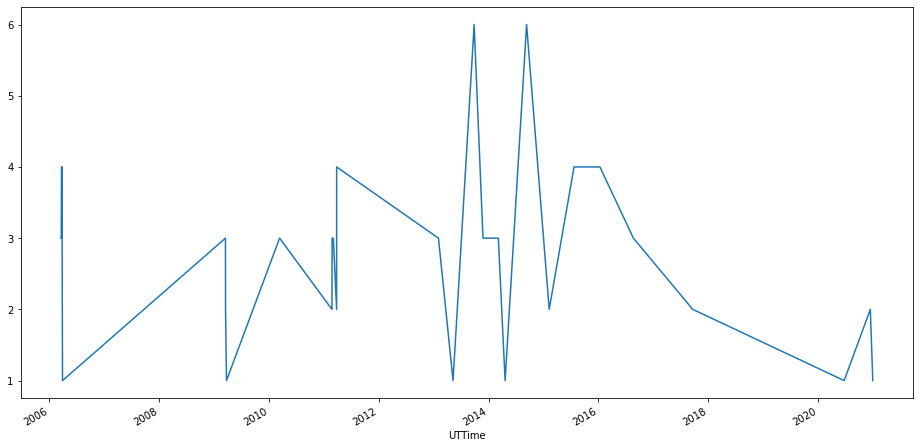

In [106]:
ganSG.set_index("UTTime").LimitingMag.plot()

In [100]:
ganCountry = pd.merge(ganCountry, countries)
ganCountry

,Latitude,Longitude,LocalTime,UTTime,LimitingMag,Country,Year,ISO-3166alpha2,ISO-3166alpha3,ISO-3166numeric,fips,Capital,Area in km²,Population,Continent,CountryCode,latitude,longitude,geometry
0,34.56000,65.4300,2006-03-23 21:00:00,2006-03-23 16:30:00,7.0,Afghanistan,2006,AF,AFG,4,AF,Kabul,647500.0,37172386,AS,AF,33.939110,67.709953,POINT (67.70995 33.93911)
1,31.86000,64.2100,2010-03-06 12:30:00,2010-03-06 08:00:00,6.0,Afghanistan,2010,AF,AFG,4,AF,Kabul,647500.0,37172386,AS,AF,33.939110,67.709953,POINT (67.70995 33.93911)
2,31.51000,64.1300,2010-03-06 20:30:00,2010-03-06 16:00:00,6.0,Afghanistan,2010,AF,AFG,4,AF,Kabul,647500.0,37172386,AS,AF,33.939110,67.709953,POINT (67.70995 33.93911)
3,31.85650,64.2108,2010-03-11 20:16:00,2010-03-11 15:46:00,6.0,Afghanistan,2010,AF,AFG,4,AF,Kabul,647500.0,37172386,AS,AF,33.939110,67.709953,POINT (67.70995 33.93911)
4,31.85600,64.2100,2010-03-12 20:10:00,2010-03-12 15:40:00,6.0,Afghanistan,2010,AF,AFG,4,AF,Kabul,647500.0,37172386,AS,AF,33.939110,67.709953,POINT (67.70995 33.93911)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185313,-29.04100,167.9610,2020-06-21 20:50:00,2020-06-21 09:50:00,6.0,Norfolk Island,2020,NF,NFK,574,NF,Kingston,34.6,1828,OC,NF,-29.040835,167.954712,POINT (167.95471 -29.04084)
185314,-29.04090,167.9850,2020-06-21 21:13:00,2020-06-21 10:13:00,6.0,Norfolk Island,2020,NF,NFK,574,NF,Kingston,34.6,1828,OC,NF,-29.040835,167.954712,POINT (167.95471 -29.04084)
185315,-29.03800,167.9630,2020-06-21 21:49:00,2020-06-21 10:49:00,5.0,Norfolk Island,2020,NF,NFK,574,NF,Kingston,34.6,1828,OC,NF,-29.040835,167.954712,POINT (167.95471 -29.04084)
185316,7.34623,134.4530,2020-06-21 20:28:00,2020-06-21 11:28:00,3.0,Palau,2020,PW,PLW,585,PS,Melekeok,458.0,17907,OC,PW,7.514980,134.582520,POINT (134.58252 7.51498)


In [37]:
ganValues = ganCountry.pivot_table(index="Country", columns="Year", values="LimitingMag", aggfunc=np.mean)
ganValues

Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,
Afghanistan,7.000000,NaN,NaN,NaN,5.571429,NaN,5.0,NaN,NaN,4.5,NaN,7.000000,NaN,NaN,NaN
Aland Islands,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,5.000000,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN
Algeria,3.272727,NaN,NaN,5.0,2.923077,NaN,6.0,3.533333,4.0,NaN,2.909091,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.600000
Yemen,3.333333,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
Zambia,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.500000,NaN,NaN,NaN


<AxesSubplot:xlabel='Year'>

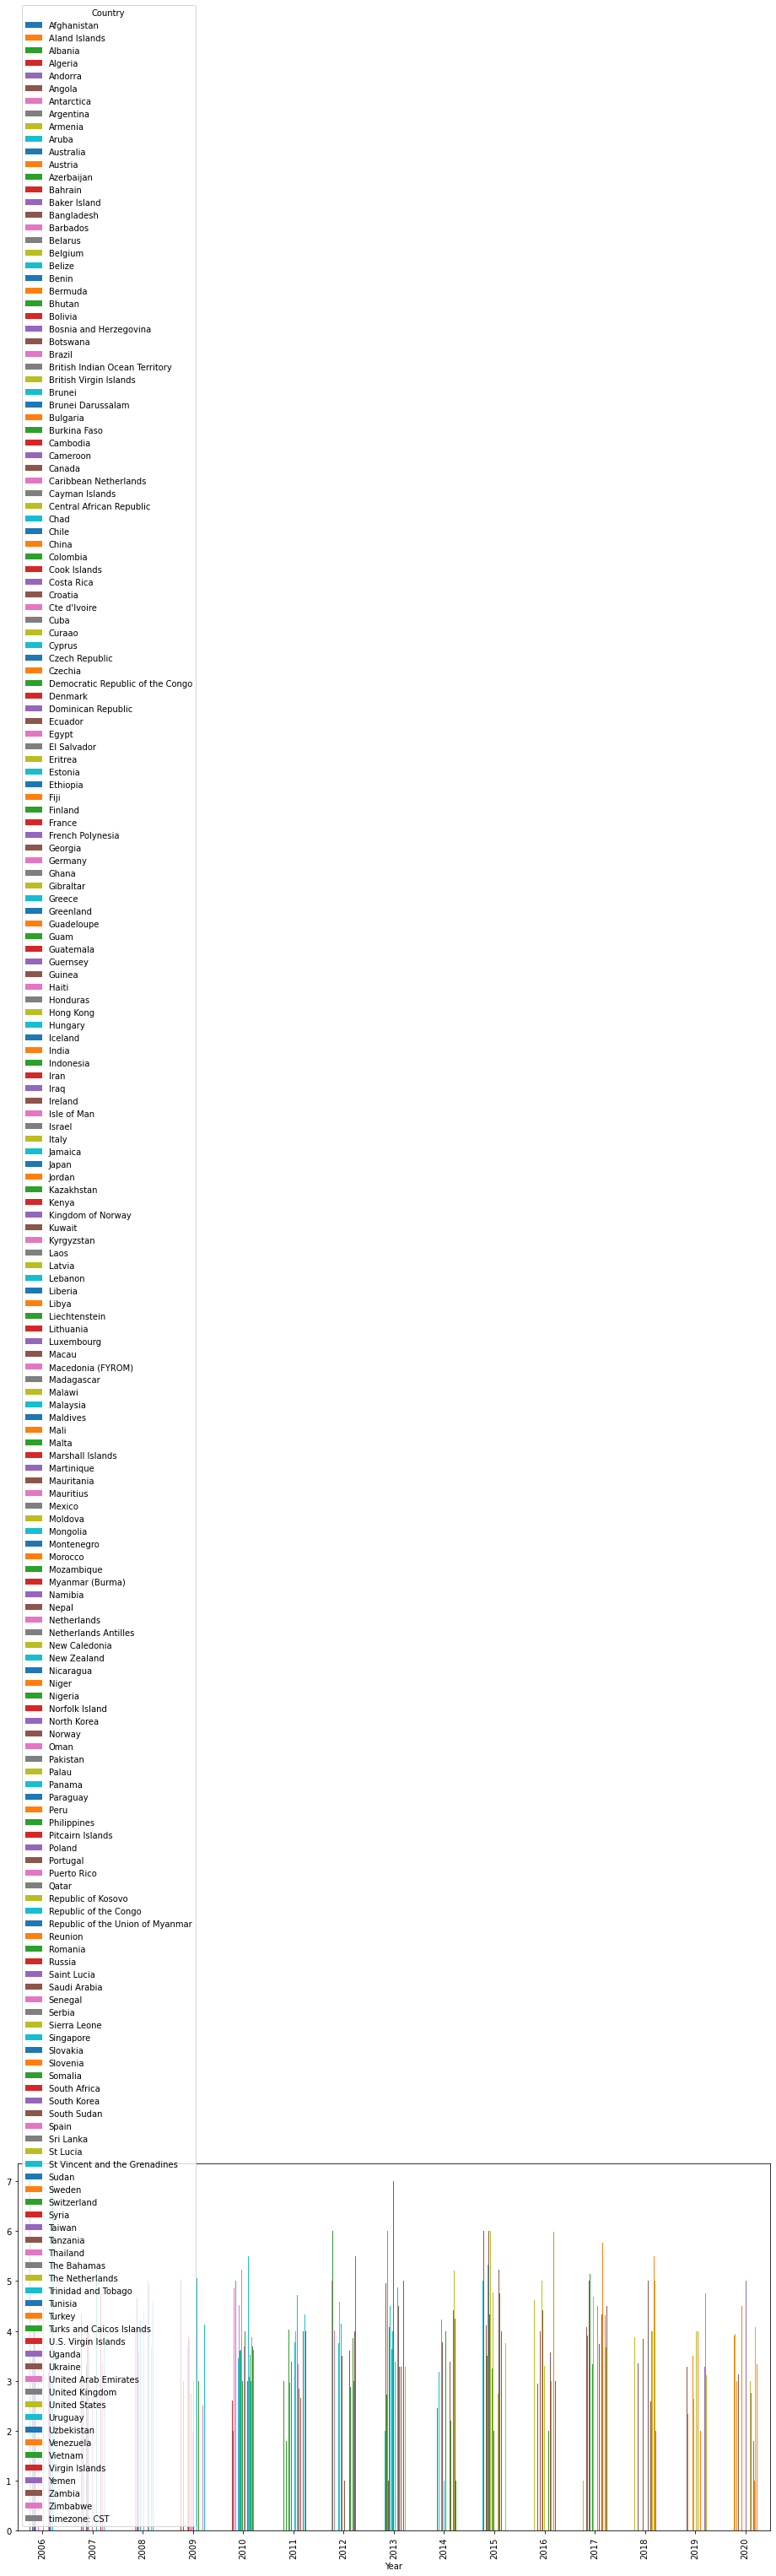

In [38]:
ganValues.T.plot.bar()

### Acquiring the iBOL Dataset
iBOL is also a pretty important dataset which collects animal images and maps them to locations, hence showing possible locations of certain animals to be found. This also requires downloading the 

In [ ]:
!curl https://hosted-datasets.gbif.org/ibol/ibol.zip > ibol.zip
!mkdir -p data/ibol/
!unzip ibol.zip -d data/ibol/
!rm data/ibol.zip

xml_data = html.parse('data/ibol/meta.xml').getroot().getchildren()[0].getchildren()[0].getchildren()
xml_data = xml_data[:1] + xml_data[3:]
ibol_meta = {}
for el in xml_data:
    el = html.document_fromstring(etree.tostring(el))
    ibol_meta[el.xpath("//files")[0].getchildren()[0].text] = [i.get("term").split("/")[-1] for i in el.xpath("//field")]

pprint(ibol_meta)

In [ ]:
!cat ibol/occurrences.txt | head -n 10
ibol_occ = pd.read_csv("data/ibol/occurrences.txt", delimiter="\t", names=ibol_meta["occurrences.txt"])
ibol_occ

In [ ]:
!cat ibol/media.txt | head -n 10
ibol_media = pd.read_csv("data/ibol/media.txt", delimiter="\t", names=ibol_meta["media.txt"])
ibol_media

In [ ]:
!cat ibol/sequence.txt | head -n 10
ibol_seq = pd.read_csv("data/ibol/sequence.txt", delimiter="\t", names=ibol_meta["sequence.txt"])
ibol_seq

In [ ]:
dmsp_ols_url = "https://ngdc.noaa.gov"
dmsp_ols = requests.get(dmsp_ols_url+"/eog/dmsp/downloadV4composites.html").content
files = [dmsp_ols_url + i["href"].replace("\n", "") for i in BeautifulSoup(dmsp_ols, "lxml").find_all("table", class_="list")[0].find_all("a")]
!rm -r dmsp
!mkdir dmsp_tar dmsp_tif dmsp
for file in files:
  print(file)
  filename = "dmsp_tar/"+file.split("/")[-1]
  r = requests.get(file, allow_redirects=True)
  with open(filename, 'wb') as fileobj: fileobj.write(r.content)

!for f in dmsp_tar/*.tar; do tar xf "$f" -C dmsp_tif/; done
!rm dmsp_tar/*.tar
!gunzip -r dmsp_tif
!rm dmsp/*.gz
output.clear()

### Acquiring Lat-Long Dataset For Countries Worldwide
This dataset is pretty explanatory, and quite possibly the easiest to acquire. I have simply read Google Developers' `countries.csv` public dataset.

In [81]:
countries_latlong = pd.read_html(requests.get("https://developers.google.com/public-data/docs/canonical/countries_csv").content)[0]
countries_latlong

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


In [83]:
countries_coords = gp.GeoDataFrame(countries_latlong, geometry=gp.points_from_xy(countries_latlong.longitude, countries_latlong.latitude))
countries_coords

,country,latitude,longitude,name,geometry
0,AD,42.546245,1.601554,Andorra,POINT (1.60155 42.54624)
1,AE,23.424076,53.847818,United Arab Emirates,POINT (53.84782 23.42408)
2,AF,33.939110,67.709953,Afghanistan,POINT (67.70995 33.93911)
3,AG,17.060816,-61.796428,Antigua and Barbuda,POINT (-61.79643 17.06082)
4,AI,18.220554,-63.068615,Anguilla,POINT (-63.06862 18.22055)
...,...,...,...,...,...
240,YE,15.552727,48.516388,Yemen,POINT (48.51639 15.55273)
241,YT,-12.827500,45.166244,Mayotte,POINT (45.16624 -12.82750)
242,ZA,-30.559482,22.937506,South Africa,POINT (22.93751 -30.55948)
243,ZM,-13.133897,27.849332,Zambia,POINT (27.84933 -13.13390)


### Acquiring NASA's EaN Blue Marble 2016 Dataset
Link: [https://visibleearth.nasa.gov/images/144898/earth-at-night-black-marble-2016-color-maps](https://visibleearth.nasa.gov/images/144898/earth-at-night-black-marble-2016-color-maps)

Satellite images of Earth at night—often referred to as “night lights”—have been a curiosity for the public and a tool of fundamental research for at least 25 years. They have provided a broad, beautiful picture, showing how humans have shaped the planet and lit up the darkness. Produced every decade or so, such maps have spawned hundreds of pop-culture uses and dozens of economic, social science, and environmental research projects.

These images show Earth’s night lights as observed in 2016. The data were reprocessed with new compositing techniques that select the best cloud-free nights in each month over each land mass.

The images are available as JPEG and GeoTIFF, in three different resolutions: 0.1 degrees (`3600x1800`), 3km (`13500x6750`), and 500m (`86400x43200`). The 500m global map is divided into tiles (21600x21600) according to a gridding scheme.

In [25]:
# Black Marble
blackMarble2016 = list(np.vectorize("https://eoimages.gsfc.nasa.gov/images/imagerecords/144000/144898/BlackMarble_2016_{}_geo.tif".format)(np.array(["A", "B", "C", "D"], dtype=object)[:, np.newaxis] + np.array(["1", "2"], dtype=object)).flatten())
blackMarble2016

['https://eoimages.gsfc.nasa.gov/images/imagerecords/144000/144898/BlackMarble_2016_A1_geo.tif',
 'https://eoimages.gsfc.nasa.gov/images/imagerecords/144000/144898/BlackMarble_2016_A2_geo.tif',
 'https://eoimages.gsfc.nasa.gov/images/imagerecords/144000/144898/BlackMarble_2016_B1_geo.tif',
 'https://eoimages.gsfc.nasa.gov/images/imagerecords/144000/144898/BlackMarble_2016_B2_geo.tif',
 'https://eoimages.gsfc.nasa.gov/images/imagerecords/144000/144898/BlackMarble_2016_C1_geo.tif',
 'https://eoimages.gsfc.nasa.gov/images/imagerecords/144000/144898/BlackMarble_2016_C2_geo.tif',
 'https://eoimages.gsfc.nasa.gov/images/imagerecords/144000/144898/BlackMarble_2016_D1_geo.tif',
 'https://eoimages.gsfc.nasa.gov/images/imagerecords/144000/144898/BlackMarble_2016_D2_geo.tif']

### Acquiring Global Radiance Calibrated Nighttime Lights Dataset
The Global Radiance Calibrated Nighttime Lights, hereby referred to as the RadCal dataset, contains multiple GeoTiff files saved as `.tgz`, hence the task is to first unzip this tar file and then open the GeoTiff Images. The code below contains the exact method to install this.

In [ ]:
urls = [a["href"] for a in BeautifulSoup(requests.get("https://ngdc.noaa.gov/eog/dmsp/download_radcal.html").content).find_all("table")[1].find_all("a", href=True) if a["href"].startswith("https")][::2]
pprint(urls)
!mkdir -p data/radcal
radcal = []
for url in urls:
    print(url)
    fn = "data/radcal/"+url.split("/")[-1]
    with open(fn, "wb") as file: file.write(requests.get(url).content)
    tar = tarfile.open(fn, "r")
    for file in tar:
        tar.extract(file, ".".join(fn.split(".")[:-1])+"/")
!ls data/radcal

### Acquiring Geonames Datasets
Geonames is used to get simple country demographics. While we are only really considering Singapore on a microscopic level, this is used especially to segment the dataset.

In [27]:
geocountries = pd.read_html(requests.get("https://www.geonames.org/countries/").content)[1]
geocountries.Continent.replace(np.nan, "NA", inplace=True)
geocountries

,ISO-3166alpha2,ISO-3166alpha3,ISO-3166numeric,fips,Country,Capital,Area in km²,Population,Continent
0,AD,AND,20,AN,Andorra,Andorra la Vella,468.0,77006,EU
1,AE,ARE,784,AE,United Arab Emirates,Abu Dhabi,82880.0,9630959,AS
2,AF,AFG,4,AF,Afghanistan,Kabul,647500.0,37172386,AS
3,AG,ATG,28,AC,Antigua and Barbuda,St. John's,443.0,96286,NA
4,AI,AIA,660,AV,Anguilla,The Valley,102.0,13254,NA
...,...,...,...,...,...,...,...,...,...
245,YE,YEM,887,YM,Yemen,Sanaa,527970.0,28498687,AS
246,YT,MYT,175,MF,Mayotte,Mamoudzou,374.0,279471,AF
247,ZA,ZAF,710,SF,South Africa,Pretoria,1219912.0,57779622,AF
248,ZM,ZMB,894,ZA,Zambia,Lusaka,752614.0,17351822,AF


In [78]:
geocodes = pd.read_html(requests.get("https://www.geonames.org/statistics/").content)[1].iloc[:250, 1:][['Country', 'CountryCode']]
geocodes

,Country,CountryCode
0,United States,US
1,China,CN
2,India,IN
3,Norway,NO
4,Mexico,MX
...,...,...
245,Norfolk Island,NF
246,San Marino,SM
247,Cocos (Keeling) Islands,CC
248,Bouvet Island,BV


In [79]:
geostats = pd.merge(geocountries, geocodes, on="Country")
geostats

,ISO-3166alpha2,ISO-3166alpha3,ISO-3166numeric,fips,Country,Capital,Area in km²,Population,Continent,CountryCode
0,AD,AND,20,AN,Andorra,Andorra la Vella,468.0,77006,EU,AD
1,AE,ARE,784,AE,United Arab Emirates,Abu Dhabi,82880.0,9630959,AS,AE
2,AF,AFG,4,AF,Afghanistan,Kabul,647500.0,37172386,AS,AF
3,AG,ATG,28,AC,Antigua and Barbuda,St. John's,443.0,96286,NA,AG
4,AI,AIA,660,AV,Anguilla,The Valley,102.0,13254,NA,AI
...,...,...,...,...,...,...,...,...,...,...
245,YE,YEM,887,YM,Yemen,Sanaa,527970.0,28498687,AS,YE
246,YT,MYT,175,MF,Mayotte,Mamoudzou,374.0,279471,AF,YT
247,ZA,ZAF,710,SF,South Africa,Pretoria,1219912.0,57779622,AF,ZA
248,ZM,ZMB,894,ZA,Zambia,Lusaka,752614.0,17351822,AF,ZM
